In [39]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

In [40]:
files = {
    'att0': 'logs/tsp100_att0/log.txt',  # '(Baseline) Bresson TSP Transformer'
    'att1': 'logs/tsp100_att1/log.txt',  # 'TSP Transformer with XL Decoder'
    'att1_50': 'logs/tsp100_att1_seg50/log.txt'  # '' with 50 Segmentation
}

In [41]:
n_epoch_count = 50
# start_lines = [20, 22, 21]
metric_names_train = ['t_batch', 't_forward', 't_backward', 'L_train', 'L_base']
metric_names_eval = ['t_eval_20', 't_step', 'L_train', 'L_base']
metric_name_epoch = ['t_epoch']
metric_name_update = ['L_train']
# result_dict = {'van': [], 'xl': [], 'xlr': []}
res_dict = {'att0': {
    'train': [], 'eval': [], 'epoch': [], 'update': []
    },
    'att1':{
        'train': [], 'eval': [], 'epoch': [], 'update': []
    },
    'att1_50':{
        'train': [], 'eval': [], 'epoch': [], 'update': []
    }
}
for file, fname in files.items():
    fname = glob(fname)[0]
    with open(fname, 'r') as f:
        lines = f.readlines()
        print(f'{file}:{fname}')

        # for line in lines:
        # for i in range(len(lines)):
        i = 0
        while i < len(lines):
            line = lines[i]
            if line[:7] == 'Epoch ' + str(n_epoch_count-1):
                break
            if line[:9] == 'Train Log':
                line = lines[i] + lines[i+1]
                metric_values = re.findall('[0-9]+\.[0-9]+', line)
                metric_values = metric_values[:5]
                metric_dict = {k:v for k, v in zip(metric_names_train, metric_values)}
                res_dict[file]['train'].append(metric_dict)
                i += 1
            elif line[:8] == 'Eval Log':
                metric_values = re.findall('[0-9]+\.[0-9]+', line)
                metric_values = metric_values[:4]
                metric_dict = {k:v for k, v in zip(metric_names_eval, metric_values)}
                res_dict[file]['eval'].append(metric_dict)
            elif line[:5] == 'Epoch':
                metric_value = re.findall('[0-9]+\.[0-9]+', line)
                res_dict[file]['epoch'].append(metric_value[0])
            elif line[:8] == 'Baseline':
                metric_value = re.findall('[0-9]+\.[0-9]+', line)
                res_dict[file]['update'].append(metric_value[0])
            i += 1

att0:logs/tsp100_att0/log.txt
att1:logs/tsp100_att1/log.txt
att1_50:logs/tsp100_att1_seg50/log.txt


In [42]:
df_at0_train = pd.DataFrame.from_dict(res_dict['att0']['train']).astype(float)
df_at0_eval = pd.DataFrame.from_dict(res_dict['att0']['eval']).astype(float)
df_at1_train = pd.DataFrame.from_dict(res_dict['att1']['train']).astype(float)
df_at1_eval = pd.DataFrame.from_dict(res_dict['att1']['eval']).astype(float)
df_at1_50_train = pd.DataFrame.from_dict(res_dict['att1_50']['train']).astype(float)
df_at1_50_eval = pd.DataFrame.from_dict(res_dict['att1_50']['eval']).astype(float)

# Train Log

In [43]:
print('Att0')
print(df_at0_train.describe())
print('Att1')
print(df_at1_train.describe())
print('Att1_50')
print(df_at1_50_train.describe())

Att0
          t_batch   t_forward  t_backward     L_train      L_base
count  298.000000  298.000000  298.000000  298.000000  298.000000
mean     1.181530    0.371309    0.578960    8.687331    8.822543
std      0.055938    0.011545    0.007882    1.258991    3.039689
min      0.981000    0.348000    0.568000    8.326120    8.258200
25%      1.156000    0.364000    0.571000    8.354235    8.272773
50%      1.163000    0.369000    0.579000    8.393960    8.312175
75%      1.184000    0.378000    0.585000    8.504225    8.377840
max      1.359000    0.422000    0.613000   18.994500   31.681400
Att1
          t_batch   t_forward  t_backward     L_train      L_base
count  298.000000  298.000000  298.000000  298.000000  298.000000
mean     1.166295    0.364943    0.579443    8.693224    8.855129
std      0.047434    0.016092    0.007289    1.297420    3.298947
min      0.960000    0.333000    0.554000    8.320650    8.251080
25%      1.157000    0.352250    0.575000    8.347558    8.278358


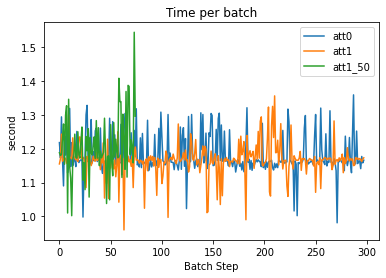

In [44]:
df_at0_train['t_batch'].plot(label='att0')
df_at1_train['t_batch'].plot(label='att1')
df_at1_50_train['t_batch'].plot(label='att1_50')
# plt.yscale('log')
plt.legend()
plt.title('Time per batch')
plt.xlabel('Batch Step')
plt.ylabel('second')
plt.show()

59 59 14


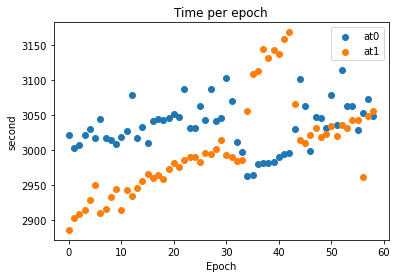

Mean Epoch times
att0 3033.3113898305082
att1 3003.366711864406
att1_50 3049.9752857142853


In [45]:
at0_train_epoch = np.array(res_dict['att0']['epoch'], dtype='float')
at1_train_epoch = np.array(res_dict['att1']['epoch'], dtype='float')
at1_50_train_epoch = np.array(res_dict['att1_50']['epoch'], dtype='float')
print(len(at0_train_epoch), len(at1_train_epoch), len(at1_50_train_epoch))
# assert len(at0_train_epoch) == len(at1_train_epoch) and len(at1_train_epoch) == len(at1_50_train_epoch)
length = len(at0_train_epoch)
plt.scatter(np.arange(length), at0_train_epoch, label='at0')
plt.scatter(np.arange(length), at1_train_epoch, label='at1')
# plt.scatter(np.arange(length), at1_50_train_epoch, label='at1_50')
plt.legend()
plt.xlabel('Epoch')
# plt.yscale('log')
plt.title('Time per epoch')
plt.ylabel('second')
plt.show()
print('Mean Epoch times')
print('att0',np.mean(at0_train_epoch))
print('att1',np.mean(at1_train_epoch))
print('att1_50',np.mean(at1_50_train_epoch))

29 27 9


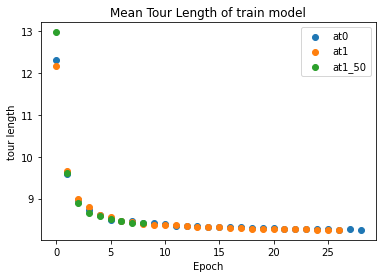

8.558058570993358
8.574704947295013
9.171115615632797


In [46]:
at0_train_update = np.array(res_dict['att0']['update'], dtype='float')
at1_train_update = np.array(res_dict['att1']['update'], dtype='float')
at1_50_train_update = np.array(res_dict['att1_50']['update'], dtype='float')
print(len(at0_train_update), len(at1_train_update), len(at1_50_train_update))
plt.scatter(np.arange(len(at0_train_update)), at0_train_update, label='at0')
plt.scatter(np.arange(len(at1_train_update)), at1_train_update, label='at1')
plt.scatter(np.arange(len(at1_50_train_update)), at1_50_train_update, label='at1_50')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('tour length')
# plt.yscale('log')
plt.title('Mean Tour Length of train model')
plt.show()
print(np.mean(at0_train_update))
print(np.mean(at1_train_update))
print(np.mean(at1_50_train_update))

8.331501
8.323125
8.551479000000002


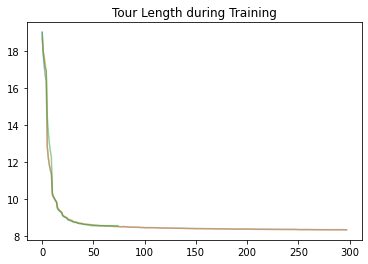

In [47]:
df_at0_train['L_train'].plot(label='at0', alpha=0.5)
print(df_at0_train['L_train'][-10:].mean())
df_at1_train['L_train'].plot(label='at1', alpha=0.5)
print(df_at1_train['L_train'][-10:].mean())
df_at1_50_train['L_train'].plot(label='at1_50', alpha=0.5)
print(df_at1_50_train['L_train'][-10:].mean())
plt.title('Tour Length during Training')
plt.show()

# Eval Log

In [48]:
print('Att0')
print(df_at0_eval.describe())
print('Att1')
print(df_at1_eval.describe())
print('Att1_50')
print(df_at1_50_eval.describe())

Att0
       t_eval_20     t_step    L_train     L_base
count  59.000000  59.000000  59.000000  59.000000
mean    7.966746   0.398322   8.434413   8.829105
std     0.807081   0.040361   0.550802   3.079604
min     7.484000   0.374000   8.258110   8.256600
25%     7.531000   0.377000   8.280810   8.278580
50%     7.576000   0.379000   8.309830   8.310310
75%     7.814000   0.390500   8.371835   8.374875
max    10.126000   0.506000  12.310220  31.706740
Att1
       t_eval_20     t_step    L_train     L_base
count  59.000000  59.000000  59.000000  59.000000
mean    7.815593   0.390780   8.436588   8.859895
std     0.405541   0.020382   0.538058   3.336265
min     7.424000   0.371000   8.250180   8.250460
25%     7.547000   0.377500   8.279490   8.276655
50%     7.638000   0.382000   8.308160   8.312770
75%     7.978500   0.399000   8.372345   8.372030
max     9.115000   0.456000  12.168540  33.728930
Att1_50
       t_eval_20     t_step    L_train     L_base
count  14.000000  14.000000  14.

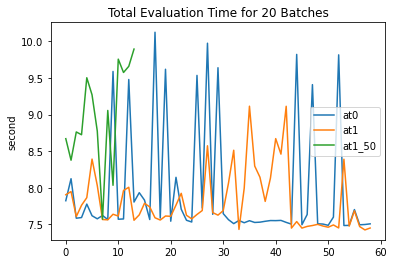

In [49]:
df_at0_eval['t_eval_20'].plot(label='at0')
df_at1_eval['t_eval_20'].plot(label='at1')
df_at1_50_eval['t_eval_20'].plot(label='at1_50')
plt.legend()
plt.title('Total Evaluation Time for 20 Batches')
plt.ylabel('second')
plt.show()

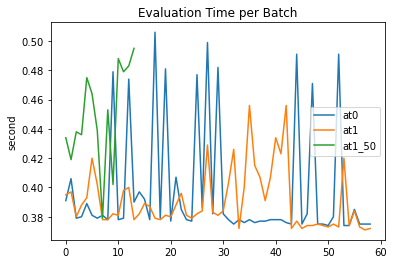

In [50]:
df_at0_eval['t_step'].plot(label='at0')
df_at1_eval['t_step'].plot(label='at1')
df_at1_50_eval['t_step'].plot(label='at1_50')
plt.title('Evaluation Time per Batch')
plt.ylabel('second')
plt.legend()
plt.show()

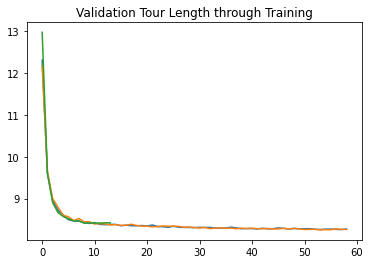

In [51]:
df_at0_eval['L_train'].plot()
df_at1_eval['L_train'].plot()
df_at1_50_eval['L_train'].plot()
plt.title('Validation Tour Length through Training')
plt.show()